In [3]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from mpb import MPB, MultipleMPB
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt

Available memory: 256.39 GB, limiting each MPB process to 6.9% usage (17.80 GB).
Creating pool of 4 processes.
Created MPB from config polygon_envs/polygon_envs_3_config.json.
Created MPB from config polygon_envs/polygon_envs_1_config.json.
Created MPB from config polygon_envs/polygon_envs_2_config.json.
Created MPB from config polygon_envs/polygon_envs_0_config.json.
Running MPB with ID polygon_envs_1 (log file at polygon_envs/polygon_envs_1.log)...
Running MPB with ID polygon_envs_2 (log file at polygon_envs/polygon_envs_2.log)...
Running MPB with ID polygon_envs_3 (log file at polygon_envs/polygon_envs_3.log)...
Running MPB with ID polygon_envs_0 (log file at polygon_envs/polygon_envs_0.log)...





Benchmark 0 (polygon_envs_0) finished successfully.
Benchmark 1 (polygon_envs_1) finished successfully.
Benchmark 2 (polygon_envs_2) finished successfully.

Benchmark 3 (polygon_envs_3) finished successfully.
All benchmarks succeeded.
Successfully merged [polygon_envs/polygon_envs_0_results.json, polygon_envs/polygon_envs_1_results.json, polygon_envs/polygon_envs_2_results.json, polygon_envs/polygon_envs_3_results.json] into poly_envs.json.


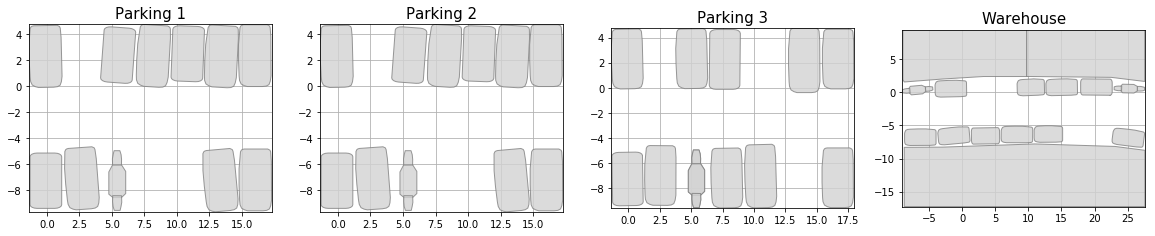

In [13]:
mazes = ["parking1.svg", "parking2.svg", "parking3.svg", "warehouse.svg"]
titles = ["Parking 1", "Parking 2", "Parking 3", "Warehouse"]
pool = MultipleMPB()
for env in mazes:
    m = MPB()
    m["max_planning_time"] = 1
    m["env.type"] = "polygon"
    m["env.polygon.source"] = "polygon_mazes/%s" % env
    m.set_planners(['informed_rrt_star'])
    pool.benchmarks.append(m)
pool.run_parallel('polygon_envs', show_plot=False)
target = "poly_envs.json"
pool.merge(target, make_separate_runs=True)

plt.figure(figsize=(20, 5))
data = json.load(open(target, "r"))
for i, maze in enumerate(mazes):
    plt.subplot(1, len(mazes), i+1)
    plot_env(data["runs"][i]["environment"], draw_start_goal_thetas=False, draw_start_goal=False, set_title=False)
    plt.title(titles[i], fontsize=15)
plt.savefig("polygon_mazes.pdf", bbox_inches='tight')